In [133]:
import numpy as np
import pandas as pd

data = pd.read_json('train.json', encoding = 'utf-8')
data = data[:1000]
data.shape

(1000, 3)

In [134]:
#присваиваем классам числовое значение
y = {'negative': -1, 'neutral': 0, 'positive': 1} 
data['y'] = data['sentiment'].map(lambda x: y[x])

#делим данные на x и y, в x будут тексты, а в у - класс
data_Y = data['y'].values
data_X = data['text'].values

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(data_X)
X_ = vectorizer.transform(data_X)

In [148]:
X_

<1000x53493 sparse matrix of type '<class 'numpy.float64'>'
	with 286389 stored elements in Compressed Sparse Row format>

In [188]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=80, n_iter=7, random_state=42)
X_reduced = svd.fit_transform(X_)
X_reduced.shape

(1000, 80)

In [185]:
X_reduced

array([[ 0.26831146,  0.37186848, -0.10669045, ..., -0.07240909,
        -0.00353057, -0.01538137],
       [ 0.16294819,  0.03912213,  0.02245818, ..., -0.03494242,
        -0.15004693, -0.08582515],
       [ 0.25560462, -0.08145851, -0.03611158, ..., -0.11014351,
        -0.02325572,  0.04854142],
       ...,
       [ 0.27558996, -0.04538443,  0.13869808, ...,  0.02696251,
        -0.03241022, -0.03703325],
       [ 0.36971824, -0.10444597, -0.1056007 , ...,  0.019642  ,
         0.01733517,  0.05069525],
       [ 0.16459598,  0.01903146,  0.06984212, ...,  0.04844292,
         0.08490946, -0.01510389]])

# Задача 1 
Проведем кластеризацию с помощью k-means. Подберем нужное количество кластеров с помощью Elbow метода и анализа силуэта.

In [314]:
from sklearn.cluster import KMeans

In [315]:
from sklearn.metrics import silhouette_score

In [324]:
model = KMeans(n_clusters=2, random_state=42)
preds = model.fit_predict(X_reduced)
silhouette_score(X_reduced, model.labels_)

0.157042879339083

In [325]:
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(X_reduced)
silhouette_score(X_reduced, model.labels_)

0.06417163032428047

In [326]:
model = KMeans(n_clusters=4, random_state=42)
preds = model.fit_predict(X_reduced)
silhouette_score(X_reduced, model.labels_)

0.05869667378197368

In [328]:
model = KMeans(n_clusters=5, random_state=42)
preds = model.fit_predict(X_reduced)
silhouette_score(X_reduced, model.labels_)

0.05183037572388238

In [329]:
model = KMeans(n_clusters=6, random_state=42)
preds = model.fit_predict(X_reduced)
silhouette_score(X_reduced, model.labels_)

0.0509518858164204

Анализ силуэта оценил модель с 2 кластерами выше, что может говорить, что лучше всего делить тексты на два кластера. Если брать количество кластеров больше двух, то высший результат у кластеризации на три группы. Применим также метод Elbow.

In [200]:
distances = []
for kl in range(1,15):
    Km = KMeans(n_clusters=kl, random_state = 42)
    Km = Km.fit(X_reduced)
    distances.append(Km.inertia_)

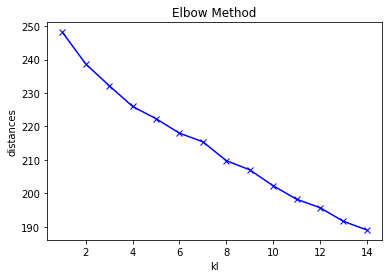

In [201]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
KM = range(1,15)

plt.plot(KM, distances, 'bx-')
plt.xlabel('kl')
plt.ylabel('distances')
plt.title('Elbow Method')
plt.show()

Если брать число кластеров больше двух, то, согласно этому методу, нельзя точно назвать оптимальное количество кластеров. Попробуем еще понизить размерность.

In [330]:
svd = TruncatedSVD(n_components=15, n_iter=7, random_state=42)
X_reduced_3 = svd.fit_transform(X_)

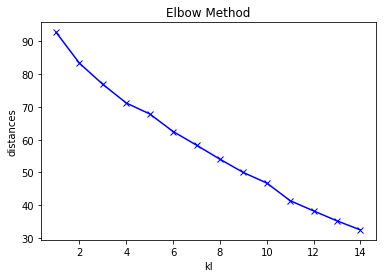

In [331]:
distances = []
for kl in range(1,15):
    Km = KMeans(n_clusters=kl, random_state = 42)
    Km = Km.fit(X_reduced_3)
    distances.append(Km.inertia_)
    
KM = range(1,15)

plt.plot(KM, distances, 'bx-')
plt.xlabel('kl')
plt.ylabel('distances')
plt.title('Elbow Method')
plt.show()

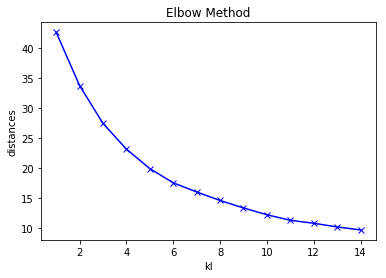

In [270]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
X_reduced_5 = svd.fit_transform(X_)

distances = []
for kl in range(1,15):
    Km = KMeans(n_clusters=kl, random_state = 42)
    Km = Km.fit(X_reduced_5)
    distances.append(Km.inertia_)
    
KM = range(1,15)

plt.plot(KM, distances, 'bx-')
plt.xlabel('kl')
plt.ylabel('distances')
plt.title('Elbow Method')
plt.show()

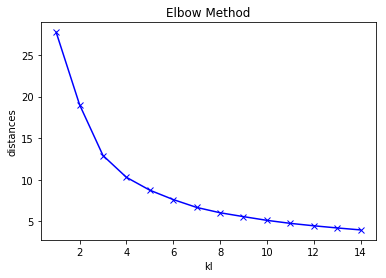

In [332]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
X_reduced_7 = svd.fit_transform(X_)

distances = []
for kl in range(1,15):
    Km = KMeans(n_clusters=kl, random_state = 42)
    Km = Km.fit(X_reduced_7)
    distances.append(Km.inertia_)
    
KM = range(1,15)

plt.plot(KM, distances, 'bx-')
plt.xlabel('kl')
plt.ylabel('distances')
plt.title('Elbow Method')
plt.show()

Данные результаты применения метода Elbow кажутся уже более интерпретируемыми, хоть до сих пор и сложно определить точное оптимальное количество кластеров. Похоже, это так же 3. Попробуем еще раз применить анализ силуэта для n_components=3.

In [338]:
model = KMeans(n_clusters=2, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.5827149314959437

In [339]:
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.37382830187320815

In [340]:
model = KMeans(n_clusters=4, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.31656774217731043

In [341]:
model = KMeans(n_clusters=5, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.3083250907478277

In [337]:
model = KMeans(n_clusters=6, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.16461217848510926

Elbow предлагает количество кластеров, равное 3, лучший показатель после 2х, судя по анализу силуэта, также 3. При том же TurnratedSVD n_components=3.

Поробуем провести кластеризацию методом K-Means, задав число кластеров, равное трем для n_components=80. Затем проведем то же самое для n_components=3.

In [342]:
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(X_reduced)

Выведем несколько типичных текстов для 1,2 и 3 кластеров.

In [205]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X_reduced, model.cluster_centers_)

In [206]:
index = []

first = [] 
second = [] 
third = [] 

for i, vec in enumerate(dist):
    index.append(i)
    first.append(vec[0])
    second.append(vec[1])
    third.append(vec[2])

In [209]:
dat = pd.DataFrame({"first":first,"second":second ,"third":third}, index = index)

Выведем три типичных текста для первого класса. То же самое сделаем и для других классов.

In [210]:
dat.sort_values(by=["first"]).head(3)

,first,second,third
103,0.172767,0.168524,0.408073
565,0.197159,0.182576,0.420744
772,0.200190,0.209784,0.420805


In [211]:
print(data_X[103])

АКТАУ. КАЗИНФОРМ - Методы, уже применявшиеся во время существования Советского союза, предлагает возродить мангистауский биолог, член Казахстанской ассоциации сохранения биоразнооразия (АСБК) Адильбек Козыбаков.  В целом он высказывается о необходимости реформирования природоохранной системы Казахстана. «Усилий одних только госструктур явно недостаточно: здесь нужен комплексный подход с обязательным вовлечением в природоохранную деятельность как самих природопользователей, так и местного населения. Сейчас ситуация такова: вскроют инспекторы факты браконьерства или нет - на размер зарплаты это не влияет. А 30 лет назад инспектор, задержавший браконьера «с поличным», на законных основаниях получал 37% от суммы, уплаченной нарушителем в бюджет. Если бы эта сумма распределялась между участниками поимки браконьеров, то от желающих охранять природу отбоя бы не было. Да и брать взятку с браконьера стало бы невыгодно - инспектора могли бы неплохо зарабатывать всего лишь исправно выполняя свою 

In [214]:
print(data_X[565])

Глубоко символично, что в год 25-летия Независимости Казахстана свекловоды Алакольского района сделали первые шаги по возрождению такой важной для экономики района отрасли, как свекловодство. И хотя начинают они со скромных 70 гектаров технической культуры, важно было сделать первый шаг. И они его сделали! 

Первым к уборке приступили в крестьянском хозяйстве «Саят» (руководитель Саят Курманбаев). Не имея должного опыта и не располагая специальной техникой здесь, тем не менее, сумели вырастить, собрать и отправить на переработку 388 тонн сладкого корня. Получив в первый (!) же год по 388 центнеров сладких корней с каждого из 10 гектаров плантаций. Результат сравнимый с показателями лучших свекловодческих звеньев середины 80-х годов, когда слава алакольских мастеров гремела по всему Семиречью. 
 Сегодня практически завершают копку сахарной свеклы и в ТОО «Нусипов и К», директором которого является опытный руководитель, депутат областного маслихата Канатхан Нусипов. Хозяйство крепкое, сп

In [213]:
print(data_X[772])

В 2016 году не без помощи международного консорциума журналистов-расследователей засветился панамский оффшор. В 2013 году та же таинственная организация слила информацию на Виргинский оффшор. В обоих случаях есть данные на казахстанских фигурантов. Так что же такое оффшоры и как они работают?, сообщает Резонанс.kz
Оффшорную компанию можно сравнить с «обнальным» лжепредприятием. Такая фирма не предоставляет реальные услуги, не производит реальные товары, у нее может быть номинальный владелец и номинальный руководитель. По сути, это компания-пустышка, через которую прогоняют денежные средства и оформляют коммерческие документы.
Поскольку открыть такую компанию несложно, то использовать ее можно в разных целях. Через нее можно оптимизировать налоговые платежи при импортных и экспортных операциях, что в принципе легально. А можно строить с помощью оффшорной компании хитроумные схемы по уводу денежных средств, перечислять туда коррупционные вознаграждения или вообще криминальные деньги. Офф

Выведем три типичных текста для второго кластера.

In [225]:
dat.sort_values(by=["second"]).head(4)

,first,second,third
445,0.228764,0.142326,0.406837
186,0.239497,0.148820,0.410505
488,0.265559,0.150229,0.416430
882,0.257240,0.153136,0.416425


In [217]:
print(data_X[445])

В рамках XVI Всероссийского энергетического форума состоялось несколько конкурсов на лучшую технологию, оборудование, продукцию и научные разработки. АО «БЭСК» помимо того, что выступило в качестве генерального спонсора и организатора нескольких актуальных тематических секций, также приняло участие в одной из самых престижных номинаций конкурса «Оригинальное оформление стенда». По решению конкурсной комиссии предприятие было признано победителем и награждено дипломом I степени Министерства промышленности и инновационной политики Республики Башкортостан. Это стало констатацией того факта, что стенд компании на протяжении всех четырех дней работа энергофорума пользовался наибольшим вниманием со стороны посетителей. Пространственно-цветовое решение выделяло его на фоне стендов других компаний: он был не просто выше и больше по площади, но и более функционален и креативен. 

Своеобразной «изюминкой», креативной находкой стенда АО «БЭСК» стало применение 3D-технологий. Всем желающим выдавал

In [218]:
print(data_X[186])

Алматы (Алма-Ата) — 29 ноября /KZinform/. Специалисты исследовательской службы компании HeadHunter Казахстан проанализировали рынок труда и составили рейтинг профессий, которые будут востребованы в 2017 году. 

Как утверждают эксперты, востребованными останутся представители IT. Уже сейчас рынок остро нуждается в высокопрофессиональных разработчиках. Разработчики программного обеспечения JAVA получают до трех миллионов тенге. 

Продажи и маркетинг также остаются в топе рейтинга. Правда, к основным требованиям добавилось Google Analytics и SMM, а работа продажников в продвинутых компаниях обязательно предполагает знание CRM-систем. 

Популярность бухгалтеров и административного персонала падает. Это связано с тем, что начал действовать закон о переходе на электронный документооборот. Много человеческих часов экономится за счет перехода к более прогрессивным инновационным методам финансовой отчетности. 

Как сообщили эксперты, в Казахстане наметился новый тренд — острая нехватка техничес

In [219]:
print(data_X[488])

Новочеркасский электровозостроительный завод (НЭВЗ, входит в состав ЗАО "Трансмашхолдинг") передал Брянскому машиностроительному заводу (АО "УК "БМЗ", также входит в состав ЗАО "Трансмашхолдинг") 500-й тяговый двигатель с опорно-осевым подвешиванием ДТК-417Ц для магистрального грузового тепловоза 2ТЭ25КМ. 

Выпуск двигателей для тепловозов является важнейшей частью реализуемой в холдинге программы развития межзаводской кооперации, осуществляется в рамках российской программы импортозамещения и входит в перечень приоритетных инвестиционных проектов Минпромторга России по приоритетным направлениям гражданской промышленности. Продукция НЭВЗа призвана заменить двигатели, которые ранее приобретались на Украине. 

Особенность двигателей ДТК-417Ц - сварная конструкция остова и подшипниковых щитов. Применение оригинальных конструктивных решений позволило унифицировать часть необходимых деталей, полностью исключить технологический литейный брак, достичь большей эффективности изоляции узлов двиг

Просмотрев тексты данного класса, можно заметить, что в основном это рассказы о каких-либо изобретениях и разработках, технологиях и, в частности IT. По большей части они не содержат в себе какой-либо оценки, но, возможно, если она присутствует, то скорее будет положительной.

In [226]:
dat.sort_values(by=["third"]).head(4)

,first,second,third
942,0.471801,0.427850,0.272748
887,0.534864,0.518245,0.283875
207,0.451240,0.461913,0.302128
518,0.390565,0.394902,0.314211


In [222]:
print(data_X[942])

В 2014 году при объединении пенсионных фондов Казахстана портфель АО "Единый накопительный пенсионный фонд" пополнился бумагами 32 дефолтных эмитентов на сумму 161,45 миллиарда тенге, сообщили в ЕНПФ в ответ на официальный запрос редакции Today.kz. Большинство проблемных компаний выплатили фонду стоимость ценных бумаг и часть вознаграждения по ним.  

"С 2014 года задолженность по номинальной стоимости снизилась бумаг снизилась до 36,45 миллиарда тенге, количество проблемных эмитентов сократилось с 32 до 19 компаний: по двум компаниям задолженность полностью погашена, по четырем структурам произведено списание финансовых инструментов в связи с завершением процедуры банкротства и ликвидацией, по семи компаниям задолженность реструктурирована. В настоящий момент фонд осуществляет работу по возврату задолженности по номинальной стоимости 40,5 миллиарда тенге в отношении 21 эмитента, допустившего дефолт, чьи финансовые инструменты входят в состав пенсионных активов", - пояснили в ЕНПФ. 
 


In [223]:
print(data_X[887])

Решение о сделке облигациями «Бузгул Аурум» принималось ЕНПФ самостоятельно
 
Решение о заключении сделки с облигациями ТОО «Бузгул Аурум» принималось в рамках самостоятельной операционной деятельности ЕНПФ на основании инвестиционного решения, принятого коллегиально инвестиционным комитетом ЕНПФ. Об этом в ходе брифинга сообщила председатель совета директоров АО «ЕНПФ» Дина Галиева, передает корреспондент Zakon.kz.
По ее словам, ЕНПФ является самостоятельным юридическим лицом, которое как любой субъект предпринимательской деятельности, имеет на праве собственности имущество и может от своего имени приобретать и осуществлять имущественные и личные неимущественные права и обязанности».
Таким образом, по ее словам, принятие инвестиционных решений в отношении собственного имущества ЕНПФ осуществляется им самостоятельно без получения каких-либо разрешений со стороны государственных органов, в случае если это прямо не предусмотрено законами Республики Казахстан.
«Согласно Закону об акционер

In [227]:
print(data_X[207])

В Едином пенсионном фонде (ЕНПФ) разъяснили каким образом будут инвестированы деньги, выделяемые по указанию главы государства. Председатель правления ЕНПФ Руслан Ерденаев ответил на вопросы журналистов в Алматы, передает LS.  По его информации, около 350 млрд тенге пойдут на приобретение ценных бумаг, выпущенных министерством финансов. «Когда говорят что деньги пойдут на финансирование дефицита бюджета, это значит, что сделано это будет как раз за счет выпуска государственных ценных бумаг, которые в дальнейшем приобретаются различными инвесторами. В данном случае инвестором будет выступать ЕНПФ», - пояснил Ерденаев. По его словам, облигации будут приобретаться на возвратной основе и будут приносить доход. Глава ЕНПФ напомнил, что около половины активов ЕНПФ уже инвестированны в государственные ценные бумаги.+ «Около 500 млрд тенге будут свободно конвертированы в иностранную валюту для дальнейшего инвестирования на международных рынках капиталов, для приобретения финансовых инструменто

In [355]:
print(data_X[518])


Эксперты Halyk Finance рассказали, как ЕНПФ инвестирует свои деньги в банки Казахстана . По данным аналитиков компании Салтанат Мадиевой и Мурата Темирханова, ЕНПФ инвестирует свои деньги в банки двумя путями - покупая облигации банков и размещая в них срочные депозиты. "С точки зрения прозрачности, покупка облигаций является наиболее предпочтительным способом инвестирования, поскольку на фондовой бирже публикуются все ключевые условия по этим ценным бумагам. Размещение денег ЕНПФ на депозитах в банках - это непрозрачный процесс, который не позволяет определить, насколько условия по таким депозитам отвечают рыночным", - отмечают эксперты. Как сообщается, в соответствии с нормальной инвестиционной практикой размер инвестиций в определенный банк должен зависеть от уровня кредитного риска и размера банка. При этом аналитики заявляют, что инвестиционные решения ЕНПФ по отношению к банкам далеки от такой практики. Это следует из данных в таблице, приведенной ниже.  В Halyk Finance отметили

В третий класс вошли тексты, схожие по тематике, в которые также входят повторяющиеся слова - деньги, пенсионный, ЕНПФ, сделка. 

Также попоробуем провести кластеризацию методом K-Means, задав число кластеров, равное трем для n_components=3.

In [366]:
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(X_reduced_7)
dist = pairwise_distances(X_reduced_7, model.cluster_centers_)
index = []

first = [] 
second = [] 
third = [] 

for i, vec in enumerate(dist):
    index.append(i)
    first.append(vec[0])
    second.append(vec[1])
    third.append(vec[2])

dat = pd.DataFrame({"first":first,"second":second ,"third":third}, index = index)

Выведем три типичных текста для первого класса. То же самое сделаем и для других классов.

In [367]:
dat.sort_values(by=["first"]).head(3)

,first,second,third
108,0.011836,0.178945,0.373918
145,0.014623,0.172572,0.376212
955,0.018376,0.166452,0.382398


In [368]:
print(data_X[108])


Версия для печати
19:23

Электроэнергетическая
Россия
Итоги работы оптового рынка электроэнергии и мощности с 14.10.2016 по 20.10.2016



Общий объем планового электропотребления на рынке на сутки вперед за прошедшую неделю составил 18,70 млн МВт∙ч. В европейской части РФ и на Урале плановое электропотребление составило 14,81 млн МВт∙ч, увеличившись по отношению к прошлой неделе на 4,6%.

Суммарный объем планового потребления в европейской части РФ и на Урале с начала года по отношению к аналогичному периоду прошлого года вырос на 1,4%. В Сибири плановое электропотребление составило 3,89 млн МВт∙ч, увеличившись по сравнению с прошлой неделей на 1,6%. Суммарный объем планового потребления в Сибири с начала года по отношению к аналогичному периоду прошлого года вырос на 0,6%.   За истекшую неделю в структуре плановой выработки европейской части России и Урала доля ТЭС выросла на 2,4 процентного пункта относительно предыдущей недели и выросла на 0,5 процентного пункта относительно средне

In [369]:
print(data_X[145])

Такие данные были озвучены на семинаре по вопросам проверки правильности и обоснованности оформления одобрений типа транспортных средств, а также хода реализации технического регламента Таможенного союза «О безопасности колесных транспортных средств», прошедшем 4 ноября т.г. в Эталонном центре. 

 

 

 

 Семинар проведен на площадке РГП «Казахстанский институт стандартизации и сертификации» при поддержке Комитета технического регулирования и метрологии (КТРМ). 

 

 
 

 

 
 

 

 

 

 В мероприятии приняли участие представители КТРМ, ТОО «Национальный центр аккредитации», ОЮЛ «КазАвтоПром», изготовителей транспортных средств и их полномочных представителей, а также органов по подтверждению соответствия (ОПС). 

 

 

 

 Открывая семинар, Заместитель Председателя КТРМ Галымжан Дугалов подчеркнул: «Развитие автомобилестроения в Казахстане, а также принятие ТР ТС 018/2011 послужили драйвером реформирования отечественной системы технического регулирования в области оценки соответстви

In [370]:
print(data_X[995])

"Банки слабые. Всего четыре банка держат 80% активов банка, остальные 26%, у некоторых нет и 1%. В мире, когда наступил кризис, объединяются крупные компании. Пусть объединяются или пусть акционеры ставят собственные деньги, если хотят сохранить банк. Другого способа сохранения банков нет. Они не нужны экономике, значит не имеют права на жизнь. Правильно? (обращаясь к Д.Акишеву, главе Нацбанка РК) Вот действуй смело! Никого не бойся! Честно по закону, как положено! Если кто будет вмешиваться, скажи мне фамилию". 
 
Об этом президент Казахстана Нурсултан Назарбаев заявил, выступая на расширенном заседании Правительства. 
 
 «Считаю, что Нацбанк работал грамотно в тяжелейший прошлый год. Сейчас я поставил задачу, чтобы возможности банка по контролю и регулированию усилить законодательно. Дать право такое надо, внести проект. И вмешательство в дела Нацбанка надо считать вмешательством в дела финансовой системы страны и наказывать», - сказал Глава государства, . 
 
«Я смотрю и вижу, чем бо

Тексты, попавшие в этот кластер, не сильно похожи по тематике, однако, можно заметить, что во всех из них приводится какая-либо статистика. Также, все эти тексты по длине довольно разнородные.

In [371]:
dat.sort_values(by=["second"]).head(3)

,first,second,third
217,0.185489,0.012316,0.392642
812,0.166795,0.015533,0.384738
21,0.148238,0.029022,0.377588


In [372]:
print(data_X[217])

Премьер поручил разобраться с тарифами «Эйр Астаны» Сегодня, 11:03 Бакытжан Сагинтаев дал задание Министерству национальной экономики во вторник, 1 ноября 
 
 
 Фото: ortcom.kz 
 
 Бакытжан Сагинтаев. 
 
Премьер-министр РК поручил МНЭ РК разобраться с ситуацией по повышению тарифов на авиаперевозки внутри страны и в соответствии с законодательством принимать решение, передает корреспондент Казинформ. 
- Мы видим, что транзитный потенциал увеличивается, через Астану очень много рейсов выходит. Мы сейчас знаем, что по основному потоку в сторону Парижа китайские туристы пользуются нашими рейсами, где-то 70% загрузки. Это очень хорошо, но в тоже время мы видим, что есть вопросы по тарифам внутри страны, особенно по направлению Астана - Алматы. Министерство экономики проводило расследование, хотел бы понять, как ситуация сейчас? Вы завершили работу или все еще ведется? - обратился Бакытжан Сагинтаев на заседании правительства к министру национальной экономики Куандыку Бишимбаеву. 
 
 
 
 Ви

In [373]:
print(data_X[812])

Алматы. 16 ноября. Центр информации. "Черные" старатели на рудниках "Казахалтына" совсем потеряли страх. Ущерб, причиняемый ими государству, исчисляется миллиардами. За последние пять лет задержано более 20 тысяч правонарушителей, но никто из них не понес уголовного наказания. Администрация золоторудного предприятия и госорганы уверены: такая активность — из-за безнаказанности, пишет Меруерт Алимова в Sputnik. 
 
 

Но что толкает людей в бездну золотых рудников, где под завалами гибнут десятки, сотни нелегальных золотодобывателей? Отсутствие денег и перспектив стали для этих людей сильнее инстинкта самосохранения.   

 
 

Драка в Бестобе  

 
 

Коллектив "Казахалтын" — более четырех тысяч человек, фабрики и три работающих рудника в Акмолинской области — в поселках Бестобе, Аксу и Жолымбет. Особенно активны "черные" старатели в Бестобе, из-за повышенного содержания там золота. В прошлом году общая товарная масса в компании составила 3,3 тонны золота, до 2019 года планируется довести 

In [374]:
print(data_X[21])

В центре Усть-Каменогорска рухнул главный мост (Сегодня, 11:27), просмотров: 88 В Усть-Каменогорске рухнул мост через Иртыш, на нем находились 6 человек. Никто не упал в воду, один мужчина вывихнул ногу во время падения . 
 
 Иртышский мост, расположенный в центре города, сейчас находится на реконструкции, во время которой демонтируют его старую часть. В ходе работ по демонтажу, часть моста рухнула, а вторая поднялась вверх. Находившиеся на месте происшествия четверо рабочих упали вниз, на мост, еще двое остались наверху, зацепившись за парапет. 
 "Очевидцы сообщили нам о пятерых людях, упавших в Иртыш, на место сразу же выехали спасатели, однако эта информация не подтвердилась", - сообщила пресс-секретарь областного ДЧС Анастасия Скляр. - Люди упали вниз. На данный момент все спасены. Один из упавших внизу повредил ногу, остальные не пострадали". 
 
 В городском отделе ЖКХ сообщили, что обрушение произошло из-за того что не выдержала одна из старых опор, находившаяся в аварийном состо

В данный кластер попали достаточно большие по объему тексты. Можно найти сходство и в тематике: все тексты содержат информацию о какой-либо кризисной ситуации или происшествии.

In [375]:
dat.sort_values(by=["third"]).head(3)

,first,second,third
646,0.346564,0.338644,0.051047
887,0.415890,0.432275,0.051497
935,0.351140,0.342839,0.051552


In [362]:
print(data_X[887])

Решение о сделке облигациями «Бузгул Аурум» принималось ЕНПФ самостоятельно
 
Решение о заключении сделки с облигациями ТОО «Бузгул Аурум» принималось в рамках самостоятельной операционной деятельности ЕНПФ на основании инвестиционного решения, принятого коллегиально инвестиционным комитетом ЕНПФ. Об этом в ходе брифинга сообщила председатель совета директоров АО «ЕНПФ» Дина Галиева, передает корреспондент Zakon.kz.
По ее словам, ЕНПФ является самостоятельным юридическим лицом, которое как любой субъект предпринимательской деятельности, имеет на праве собственности имущество и может от своего имени приобретать и осуществлять имущественные и личные неимущественные права и обязанности».
Таким образом, по ее словам, принятие инвестиционных решений в отношении собственного имущества ЕНПФ осуществляется им самостоятельно без получения каких-либо разрешений со стороны государственных органов, в случае если это прямо не предусмотрено законами Республики Казахстан.
«Согласно Закону об акционер

In [376]:
print(data_X[646])

В АО «ЕНПФ» началась подготовка к кампании по ежегодному обязательному информированию вкладчиков о накоплениях за 2016 год, сообщает Today.kz со ссылкой на пресс-службу пенсионного фонда. В общей сложности финансовая структура информирует более четырех миллионов человек об их накоплениях. 
 «Около 2,6 миллиона человек могут получить выписки за прошедший год посредством интернет-связи (через сайт или мобильное приложение ENPF). Около двух миллионов вкладчиков получат выписки посредством почтовой связи, 206 349 клиентов ЕНПФ узнают о своих накоплениях посредством электронной почты. При этом каждый вкладчик может получить информацию о состоянии своих пенсионных накоплений при личном обращении в ЕНПФ», — отметили в организации. 
 Информация о состоянии индивидуального пенсионного счета предоставляется бесплатно, а способ получения можно выбрать самостоятельно. 
 «Выписки будут высланы на адреса, в том числе и адреса электронной почты, указанные вкладчиками в заявлении об открытии пенсионно

In [377]:
print(data_X[935])

Как и следовало ожидать, минувший год, к концу которого грянул скандал вокруг «ЕНПФ» и Нацбанка, управляющего госпакетом акций этого монополиста, оказался весьма неудачным по результатам инвестирования пенсионных накоплений. 

 Минусы перевесили плюсы 

Если по итогам 2015 года Нацбанк заработал для будущих пенсионеров страны в виде начисленного инвестиционного дохода 820,3 млрд тенге, то за 2016 год значение этого показателя сократилось более чем в полтора раза — до 531,0 млрд тенге. В абсолютном выражении, как нетрудно подсчитать, инвестдоход снизился на внушительную сумму в 289,3 млрд тенге, которую вкладчикам ЕНПФ никто не вернет. А 

из расчета на один индивидуальный пенсионный счет в «ЕНПФ» потери по сравнению с 2015 годом составили порядка 29 тысяч тенге 

Плачевно закончился и декабрь, на который пришелся пик скандальных событий вокруг ЕНПФ — после оглашения предварительных результатов расследования чекистов лишь одной из инвестиционных сделок, ареста причастных к ней топ-менед

В этот кластер вошли тексты среднего объема, которые каким-либо образом связаны с ЕНПФ.

# Задача 2

Проведем кластеризацию на 2 класса, предварительно удалив из выборки нейтральные отзывы.

In [344]:
data_2 = data.drop(data[data['y'] == 0].index)

data_Y_2 = data['y'].values
data_X_2 = data['text'].values

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(data_X_2)
X_2 = vectorizer.transform(data_X_2)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
X_reduced_2 = svd.fit_transform(X_2)
X_reduced_2.shape

(1000, 100)

In [345]:
model = KMeans(n_clusters=2, random_state=42)
preds = model.fit_predict(X_reduced_2)

In [346]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X_reduced_2, model.cluster_centers_)

In [347]:
index = []

first = [] 
second = []

for i, vec in enumerate(dist):
    index.append(i)
    first.append(vec[0])
    second.append(vec[1])

Выведем наиболее типичные для каждого класса тексты.

In [348]:
d = pd.DataFrame({"first":first,"second":second}, index = index)

In [349]:
d.sort_values(by=["first"]).head(3)

,first,second
695,0.153021,0.404357
103,0.167305,0.413050
445,0.179941,0.417834


In [234]:
print(data_X[695])


Министр образования и науки Ерлан Сагадиев настаивает на сохранении предмета «История Казахстана» в тестовых заданиях ЕНТ. Об этом он заявил, представляя новый формат ЕНТ во время заседания правительства. 

«Наиболее часто озвучивались два предложения. Я хочу озвучить их и позицию МОН. Первое, убрать предмет «История Казахстана» из ЕНТ. Действительно, сегодня сдается два раза — в школе и на ЕНТ. Мы считаем, что его надо оставить, поскольку, по мнению общественности, предмет очень важный и в ЕНТ он должен быть. Второе, освободить обладателей «Алтын белги», а также победителей и призеров различных олимпиад и конкурсов, научных проектов от ЕНТ. Мы это предложение также не поддержали. Считаем, что ЕНТ должны сдавать все», — сообщил Ерлан Сагадиев. 

Он также отметил, что ЕНТ выполняет свою функцию в качестве завершающего школьного экзамена. 

«В ЕНТ никогда не принимало участие 100 процентов выпускников. Также с каждым годом увеличивается количество детей, не участвующих в ЕНТ. Их количест

In [235]:
print(data_X[103])

АКТАУ. КАЗИНФОРМ - Методы, уже применявшиеся во время существования Советского союза, предлагает возродить мангистауский биолог, член Казахстанской ассоциации сохранения биоразнооразия (АСБК) Адильбек Козыбаков.  В целом он высказывается о необходимости реформирования природоохранной системы Казахстана. «Усилий одних только госструктур явно недостаточно: здесь нужен комплексный подход с обязательным вовлечением в природоохранную деятельность как самих природопользователей, так и местного населения. Сейчас ситуация такова: вскроют инспекторы факты браконьерства или нет - на размер зарплаты это не влияет. А 30 лет назад инспектор, задержавший браконьера «с поличным», на законных основаниях получал 37% от суммы, уплаченной нарушителем в бюджет. Если бы эта сумма распределялась между участниками поимки браконьеров, то от желающих охранять природу отбоя бы не было. Да и брать взятку с браконьера стало бы невыгодно - инспектора могли бы неплохо зарабатывать всего лишь исправно выполняя свою 

In [236]:
print(data_X[445])

В рамках XVI Всероссийского энергетического форума состоялось несколько конкурсов на лучшую технологию, оборудование, продукцию и научные разработки. АО «БЭСК» помимо того, что выступило в качестве генерального спонсора и организатора нескольких актуальных тематических секций, также приняло участие в одной из самых престижных номинаций конкурса «Оригинальное оформление стенда». По решению конкурсной комиссии предприятие было признано победителем и награждено дипломом I степени Министерства промышленности и инновационной политики Республики Башкортостан. Это стало констатацией того факта, что стенд компании на протяжении всех четырех дней работа энергофорума пользовался наибольшим вниманием со стороны посетителей. Пространственно-цветовое решение выделяло его на фоне стендов других компаний: он был не просто выше и больше по площади, но и более функционален и креативен. 

Своеобразной «изюминкой», креативной находкой стенда АО «БЭСК» стало применение 3D-технологий. Всем желающим выдавал

In [237]:
d.sort_values(by=["second"]).head(3)

,first,second
887,0.521903,0.292112
942,0.462084,0.316510
728,0.568837,0.329802


In [238]:
print(data_X[887])

Решение о сделке облигациями «Бузгул Аурум» принималось ЕНПФ самостоятельно
 
Решение о заключении сделки с облигациями ТОО «Бузгул Аурум» принималось в рамках самостоятельной операционной деятельности ЕНПФ на основании инвестиционного решения, принятого коллегиально инвестиционным комитетом ЕНПФ. Об этом в ходе брифинга сообщила председатель совета директоров АО «ЕНПФ» Дина Галиева, передает корреспондент Zakon.kz.
По ее словам, ЕНПФ является самостоятельным юридическим лицом, которое как любой субъект предпринимательской деятельности, имеет на праве собственности имущество и может от своего имени приобретать и осуществлять имущественные и личные неимущественные права и обязанности».
Таким образом, по ее словам, принятие инвестиционных решений в отношении собственного имущества ЕНПФ осуществляется им самостоятельно без получения каких-либо разрешений со стороны государственных органов, в случае если это прямо не предусмотрено законами Республики Казахстан.
«Согласно Закону об акционер

In [239]:
print(data_X[942])

В 2014 году при объединении пенсионных фондов Казахстана портфель АО "Единый накопительный пенсионный фонд" пополнился бумагами 32 дефолтных эмитентов на сумму 161,45 миллиарда тенге, сообщили в ЕНПФ в ответ на официальный запрос редакции Today.kz. Большинство проблемных компаний выплатили фонду стоимость ценных бумаг и часть вознаграждения по ним.  

"С 2014 года задолженность по номинальной стоимости снизилась бумаг снизилась до 36,45 миллиарда тенге, количество проблемных эмитентов сократилось с 32 до 19 компаний: по двум компаниям задолженность полностью погашена, по четырем структурам произведено списание финансовых инструментов в связи с завершением процедуры банкротства и ликвидацией, по семи компаниям задолженность реструктурирована. В настоящий момент фонд осуществляет работу по возврату задолженности по номинальной стоимости 40,5 миллиарда тенге в отношении 21 эмитента, допустившего дефолт, чьи финансовые инструменты входят в состав пенсионных активов", - пояснили в ЕНПФ. 
 


In [240]:
print(data_X[728])

Пенсионный «ларчик» Нацбанка Подробности 33 27.12.2016 Тулеген АСКАРОВ, Айдын ДАИРБЕКОВ View Comments 

Значительное снижение инвестиционного дохода по пенсионным накоплениям казахстанцев к концу уходящего года превратилось в настоящую финансовую драму, ставшую объектом пристального внимания правоохранительных органов. 

 

В этой драме, как уже не раз отмечалось, главным отрицательным персонажем выступает центральный банк страны, управляющий этой огромной массой денег, принадлежащих не государству, а миллионам вкладчиков «ЕНПФ». Проблема заключается еще и в том, что у Нацбанка как регулятора финансового рынка при этом возникает серьезный конфликт интересов, в результате которого он особо не заинтересован в росте доходности по пенсионным накоплениям, как и в надлежащем контроле за инвестированием этих средств. Об этом говорилось и в материале «Без стабильного тенге пенсии превращаются в ничто», опубликованном «365info.kz» в конце октября. Там же отмечалось, что с месячного максимума в 

In [245]:
model.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [263]:
count_1_pos = 0
count_1_neg = 0
count_0_pos = 0
count_0_neg = 0
for i, x in enumerate(model.labels_):
    if x == 1:
        if data_Y[i] == 1:
            count_1_pos += 1
        if data_Y[i] == -1:
            count_1_neg += 1
    if x == 0:
        if data_Y[i] == 1:
            count_0_pos += 1
        if data_Y[i] == -1:
            count_0_neg += 1
        
print(count_1_pos, count_1_neg, count_0_pos, count_0_neg)

11 34 331 161


Можно заметить, что для первого класса более свойственна положительная оценка, а для второго - отрицательная, однако, разница не настолько значителная. 24/76 % и 67/33%.

# Extra task 3

In [378]:
from scipy.cluster.hierarchy import linkage

hierarchy = linkage(X_reduced_7, 'ward')

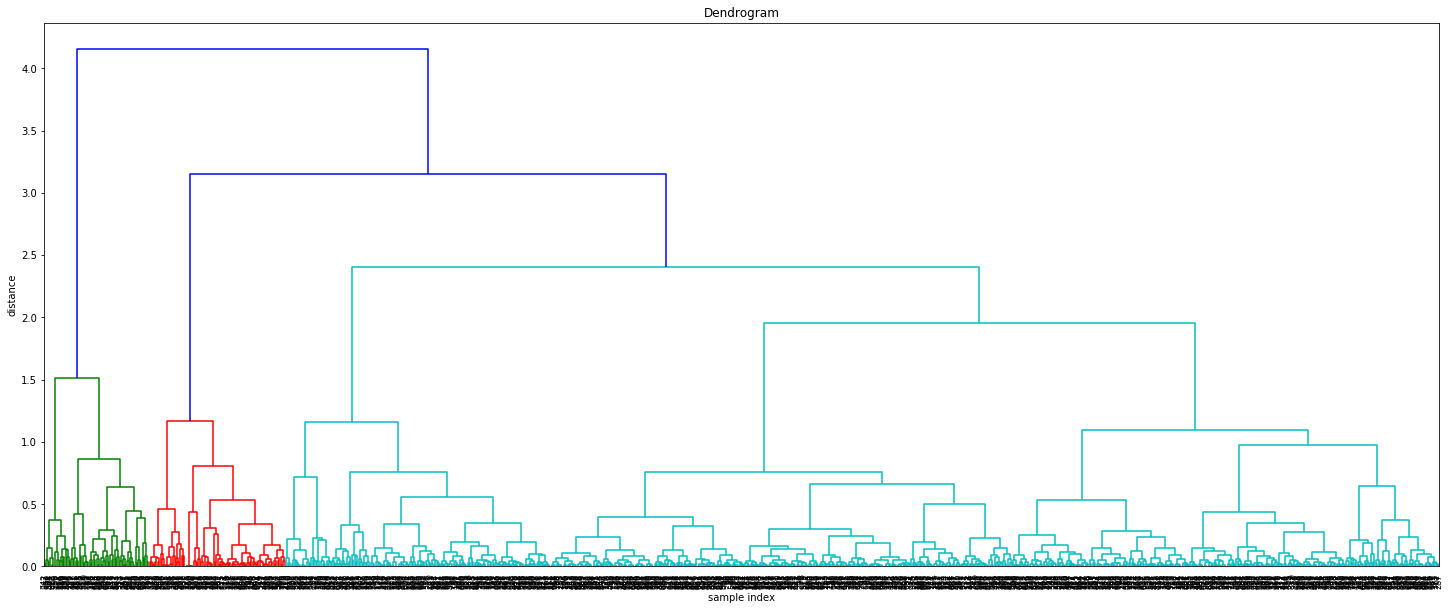

In [379]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hierarchy,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.axhline(y=17, c='c')
plt.show()

В дендрограмме также четко можно выделить 2 или 3 класса, как и в elbow или анализе силуэта.

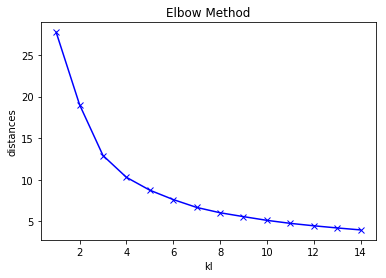

In [380]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
X_reduced_7 = svd.fit_transform(X_)

distances = []
for kl in range(1,15):
    Km = KMeans(n_clusters=kl, random_state = 42)
    Km = Km.fit(X_reduced_7)
    distances.append(Km.inertia_)
    
KM = range(1,15)

plt.plot(KM, distances, 'bx-')
plt.xlabel('kl')
plt.ylabel('distances')
plt.title('Elbow Method')
plt.show()

In [381]:
model = KMeans(n_clusters=2, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.5827149314959437

In [382]:
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.37382830187320815

In [383]:
model = KMeans(n_clusters=4, random_state=42)
preds = model.fit_predict(X_reduced_7)
silhouette_score(X_reduced_7, model.labels_)

0.31656774217731043

Построим дендрограмму также для выборки без нейтрального класса.

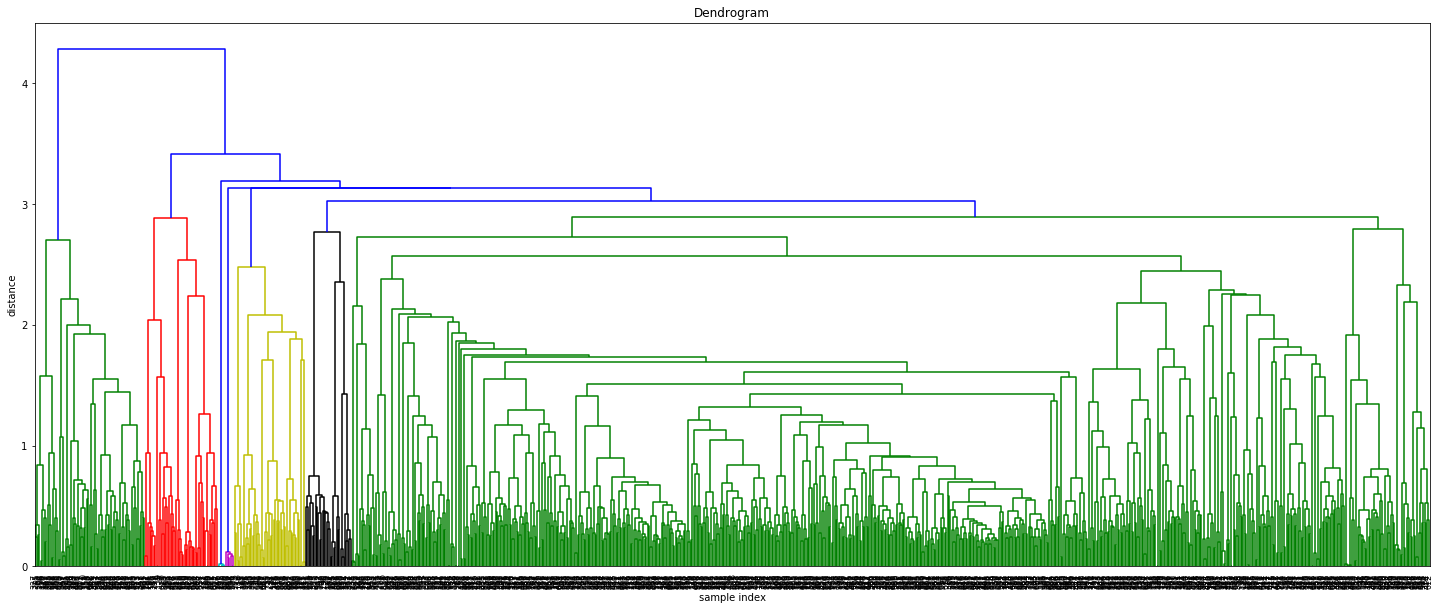

In [385]:
hierarchy = linkage(X_reduced_2, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hierarchy,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.axhline(y=17, c='c')
plt.show()

Данные можно четко разделить на 2 класса.